In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from IPython.display import display

In [2]:
# Extraindo dados da Yahoo Finance e selecionando as datas
def baixar_dados(ticker, data_inicio, data_fim):
    try:
        dados = yf.download(ticker, start=data_inicio, end=data_fim)
        return dados
    except Exception as e:
        print(f"Erro ao baixar dados: {e}")
        return None

# Calculando a variação percentual entre o preço de abertura e fechamento
def calcular_resultado_percentual(dados):
    dados['Resultado%'] = (dados['Close'] - dados['Open']) / dados['Open'] * 100
    display(dados)
    return dados

# Classificando os resultados em Positivo, Negativo e Nulo
def adicionar_resultado_binario(dados):
    conditions = [
        (dados['Resultado%'] > 0),
        (dados['Resultado%'] < 0),
        (dados['Resultado%'] == 0)
    ]
    values = ['Positivo', 'Negativo', 'Nulo']
    dados['Resultado_binario'] = np.select(conditions, values, default=None)
    display(dados)
    return dados

# Contando a quantidade de dias positivos e negativos
def contar_dias(dados):
    dias_positivos = len(dados[dados['Resultado_binario'] == 'Positivo'])
    dias_negativos = len(dados[dados['Resultado_binario'] == 'Negativo'])
    print(f"Dias Positivos: {dias_positivos}, Dias Negativos: {dias_negativos}")

# Agrupando os resultados em dois grupos de tamanhos iguais
def agrupar_por_tamanho(dados):
    dados['Grupos_mesmo_tamanho'] = pd.cut(dados['Resultado%'], 2, labels=['piores_dias', 'melhores_dias'])
    display(dados)
    return dados

# Classificando os resultados em intervalos predefinidos
def intervalos_predefinidos(dados):
    lista_intervalos = [(-25, -2), (-2, -1), (-1, 1), (1, 2), (2, 25)]
    bins = pd.IntervalIndex.from_tuples(lista_intervalos)
    dados['Grupos_pre_definidos'] = pd.cut(dados['Resultado%'], bins)
    display(dados)
    return dados

# Contando a quantidade de dias em cada intervalo predefinido
def contar_grupos(dados):
    contagem = dados['Grupos_pre_definidos'].value_counts()
    display(contagem)
    return contagem

# Filtrando os dados para mostrar apenas os dias com resultado percentual entre -1% e 1%
def filtrar_intervalo(dados):
    filtrados = dados[dados['Resultado%'].between(-1, 1)]
    display(filtrados)
    return filtrados

# Calculando a média e o desvio padrão do resultado percentual
def estatisticas(dados):
    media_resultado = dados['Resultado%'].mean()
    desvio_padrao_resultado = dados['Resultado%'].std()
    print(f"Média do Resultado%: {media_resultado}, Desvio Padrão do Resultado%: {desvio_padrao_resultado}")
    return media_resultado, desvio_padrao_resultado

# Calculando a correlação entre os preços de abertura e fechamento
def correlacao(dados):
    correlacao_open_close = dados['Open'].corr(dados['Close'])
    print(f"Correlação entre Abertura e Fechamento: {correlacao_open_close}")
    return correlacao_open_close

# Calculando a média móvel de 20 dias
def media_movel(dados, janela=20):
    dados['Média_Móvel_20'] = dados['Close'].rolling(window=janela).mean()
    display(dados)
    return dados

# Plotando o gráfico de média móvel com grid e texto rotacionado
def plotar_media_movel(dados):
    plt.figure(figsize=(17, 6))
    plt.plot(dados['Close'], label='Fechamento')
    plt.plot(dados['Média_Móvel_20'], label='Média Móvel 20 Dias')
    plt.legend()
    plt.title('Fechamento e Média Móvel 20 Dias', fontweight="bold")
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
    plt.text(-0.035, 0.5, 'Preços em Reais (BRL)', va='center', ha='center', 
             rotation='vertical', rotation_mode='anchor', transform=plt.gca().transAxes)
    plt.show()

def identificar_altas_baixas(dados):
    altas, _ = find_peaks(dados['Close'])
    dados.loc[dados.index[altas], 'Altas'] = dados.loc[dados.index[altas], 'Close']
    baixas, _ = find_peaks(-dados['Close'])
    dados.loc[dados.index[baixas], 'Baixas'] = dados.loc[dados.index[baixas], 'Close']
    display(dados)
    return dados

# Plotando o gráfico de altas e baixas com grid e texto rotacionado
def plotar_altas_baixas(dados):
    plt.figure(figsize=(17, 6))
    plt.plot(dados['Close'], label='Fechamento', color='#800080')
    plt.scatter(dados.index, dados['Altas'], color='green', label='Altas', s=50)
    plt.scatter(dados.index, dados['Baixas'], color='magenta', label='Baixas', s=25)
    plt.legend()
    plt.title('Fechamento com Altas e Baixas', fontweight="bold")
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
    plt.text(-0.035, 0.5, 'Preços em Reais (BRL)', va='center', ha='center', 
             rotation='vertical', rotation_mode='anchor', transform=plt.gca().transAxes)
    dados['Baixas'].fillna(dados['Close'], inplace=True)

    plt.show()

In [3]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from IPython.display import display

In [4]:
# Extraindo dados da Yahoo Finance e selecionando as datas
def baixar_dados(ticker, data_inicio, data_fim):
    try:
        dados = yf.download(ticker, start=data_inicio, end=data_fim)
        return dados
    except Exception as e:
        print(f"Erro ao baixar dados: {e}")
        return None

# Calculando a variação percentual entre o preço de abertura e fechamento
def calcular_resultado_percentual(dados):
    dados['Resultado%'] = ((dados['Close'] - dados['Open']) / dados['Open'] * 100).round()
    display(dados)
    return dados

# Classificando os resultados em Positivo, Negativo e Nulo
def adicionar_resultado_binario(dados):
    conditions = [
        (dados['Resultado%'] > 0),
        (dados['Resultado%'] < 0),
        (dados['Resultado%'] == 0)
    ]
    values = ['Positivo', 'Negativo', 'Nulo']
    dados['Resultado_binario'] = np.select(conditions, values, default=None)
    display(dados)
    return dados

# Contando a quantidade de dias positivos e negativos
def contar_dias(dados):
    dias_positivos = len(dados[dados['Resultado_binario'] == 'Positivo'])
    dias_negativos = len(dados[dados['Resultado_binario'] == 'Negativo'])
    print(f"Dias Positivos: {dias_positivos}, Dias Negativos: {dias_negativos}")

# Agrupando os resultados em dois grupos de tamanhos iguais
def agrupar_por_tamanho(dados):
    dados['Grupos_mesmo_tamanho'] = pd.cut(dados['Resultado%'], 2, labels=['piores_dias', 'melhores_dias'])
    display(dados)
    return dados

# Classificando os resultados em intervalos predefinidos
def intervalos_predefinidos(dados):
    lista_intervalos = [(-25, -2), (-2, -1), (-1, 1), (1, 2), (2, 25)]
    bins = pd.IntervalIndex.from_tuples(lista_intervalos)
    dados['Grupos_pre_definidos'] = pd.cut(dados['Resultado%'], bins)
    display(dados)
    return dados

# Contando a quantidade de dias em cada intervalo predefinido
def contar_grupos(dados):
    contagem = dados['Grupos_pre_definidos'].value_counts()
    display(contagem)
    return contagem

# Filtrando os dados para mostrar apenas os dias com resultado percentual entre -1% e 1%
def filtrar_intervalo(dados):
    filtrados = dados[dados['Resultado%'].between(-1, 1)]
    display(filtrados)
    return filtrados

# Calculando a média e o desvio padrão do resultado percentual
def estatisticas(dados):
    media_resultado = dados['Resultado%'].mean()
    desvio_padrao_resultado = dados['Resultado%'].std()
    print(f"Média do Resultado%: {media_resultado}, Desvio Padrão do Resultado%: {desvio_padrao_resultado}")
    return media_resultado, desvio_padrao_resultado

# Calculando a correlação entre os preços de abertura e fechamento
def correlacao(dados):
    correlacao_open_close = dados['Open'].corr(dados['Close'])
    print(f"Correlação entre Abertura e Fechamento: {correlacao_open_close}")
    return correlacao_open_close

# Calculando a média móvel de 20 dias
def media_movel(dados, janela=20):
    dados['Média_Móvel_20'] = dados['Close'].rolling(window=janela).mean().round()
    display(dados)
    return dados

def plotar_media_movel(dados):
    plt.figure(figsize=(17, 6))
    plt.plot(dados['Close'], label='Fechamento')
    plt.plot(dados['Média_Móvel_20'], label='Média Móvel 20 Dias')
    plt.legend()
    plt.title('Fechamento e Média Móvel 20 Dias', fontweight="bold")
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
    plt.text(-0.035, 0.5, 'Preços em Reais (BRL)', va='center', ha='center', 
             rotation='vertical', rotation_mode='anchor', transform=plt.gca().transAxes)
    plt.show()

# Identificando "altas" e "baixas" nos dados de fechamento
def identificar_altas_baixas(dados):
    altas, _ = find_peaks(dados['Close'])
    dados.loc[dados.index[altas], 'Altas'] = dados.loc[dados.index[altas], 'Close']
    baixas, _ = find_peaks(-dados['Close'])
    dados.loc[dados.index[baixas], 'Baixas'] = dados.loc[dados.index[baixas], 'Close']
    dados[['Altas', 'Baixas']] = dados[['Altas', 'Baixas']].round(2)
    display(dados)
    return dados

def plotar_altas_baixas(dados):
    plt.figure(figsize=(17, 6))
    plt.plot(dados['Close'], label='Fechamento', color='#800080')
    plt.scatter(dados.index, dados['Altas'], color='green', label='Altas', s=50)
    baixas_plot = dados.dropna(subset=['Baixas'])
    plt.scatter(baixas_plot.index, baixas_plot['Baixas'], color='magenta', label='Baixas', s=25)
    plt.legend()
    plt.title('Fechamento com Altas e Baixas', fontweight="bold")
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
    plt.text(-0.035, 0.5, 'Preços em Reais (BRL)', va='center', ha='center', 
             rotation='vertical', rotation_mode='anchor', transform=plt.gca().transAxes)
    plt.show()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Resultado%
Date,,,,,,,
2023-01-02,23.540001,23.809999,22.799999,22.920000,16.502495,78424700,-3.0
2023-01-03,22.940001,23.100000,22.129999,22.340000,16.084892,96750300,-3.0
2023-01-04,21.959999,23.590000,21.830000,23.049999,16.596094,129504000,5.0
2023-01-05,23.340000,24.040001,23.150000,23.879999,17.193699,73886000,2.0
2023-01-06,23.940001,24.320000,23.549999,23.740000,17.092899,51851500,-1.0
...,...,...,...,...,...,...,...
2024-05-23,37.439999,37.709999,36.570000,36.810001,36.810001,47987800,-2.0
2024-05-24,37.070000,37.189999,36.570000,36.610001,36.610001,23684700,-1.0
2024-05-27,36.720001,37.080002,36.689999,37.009998,37.009998,13623300,1.0


,Open,High,Low,Close,Adj Close,Volume,Resultado%,Resultado_binario
Date,,,,,,,,
2023-01-02,23.540001,23.809999,22.799999,22.920000,16.502495,78424700,-3.0,Negativo
2023-01-03,22.940001,23.100000,22.129999,22.340000,16.084892,96750300,-3.0,Negativo
2023-01-04,21.959999,23.590000,21.830000,23.049999,16.596094,129504000,5.0,Positivo
2023-01-05,23.340000,24.040001,23.150000,23.879999,17.193699,73886000,2.0,Positivo
2023-01-06,23.940001,24.320000,23.549999,23.740000,17.092899,51851500,-1.0,Negativo
...,...,...,...,...,...,...,...,...
2024-05-23,37.439999,37.709999,36.570000,36.810001,36.810001,47987800,-2.0,Negativo
2024-05-24,37.070000,37.189999,36.570000,36.610001,36.610001,23684700,-1.0,Negativo
2024-05-27,36.720001,37.080002,36.689999,37.009998,37.009998,13623300,1.0,Positivo


Dias Positivos: 149, Dias Negativos: 113


,Open,High,Low,Close,Adj Close,Volume,Resultado%,Resultado_binario,Grupos_mesmo_tamanho
Date,,,,,,,,,
2023-01-02,23.540001,23.809999,22.799999,22.920000,16.502495,78424700,-3.0,Negativo,piores_dias
2023-01-03,22.940001,23.100000,22.129999,22.340000,16.084892,96750300,-3.0,Negativo,piores_dias
2023-01-04,21.959999,23.590000,21.830000,23.049999,16.596094,129504000,5.0,Positivo,melhores_dias
2023-01-05,23.340000,24.040001,23.150000,23.879999,17.193699,73886000,2.0,Positivo,melhores_dias
2023-01-06,23.940001,24.320000,23.549999,23.740000,17.092899,51851500,-1.0,Negativo,piores_dias
...,...,...,...,...,...,...,...,...,...
2024-05-23,37.439999,37.709999,36.570000,36.810001,36.810001,47987800,-2.0,Negativo,piores_dias
2024-05-24,37.070000,37.189999,36.570000,36.610001,36.610001,23684700,-1.0,Negativo,piores_dias
2024-05-27,36.720001,37.080002,36.689999,37.009998,37.009998,13623300,1.0,Positivo,melhores_dias


,Open,High,Low,Close,Adj Close,Volume,Resultado%,Resultado_binario,Grupos_mesmo_tamanho,Grupos_pre_definidos
Date,,,,,,,,,,
2023-01-02,23.540001,23.809999,22.799999,22.920000,16.502495,78424700,-3.0,Negativo,piores_dias,"(-25, -2]"
2023-01-03,22.940001,23.100000,22.129999,22.340000,16.084892,96750300,-3.0,Negativo,piores_dias,"(-25, -2]"
2023-01-04,21.959999,23.590000,21.830000,23.049999,16.596094,129504000,5.0,Positivo,melhores_dias,"(2, 25]"
2023-01-05,23.340000,24.040001,23.150000,23.879999,17.193699,73886000,2.0,Positivo,melhores_dias,"(1, 2]"
2023-01-06,23.940001,24.320000,23.549999,23.740000,17.092899,51851500,-1.0,Negativo,piores_dias,"(-2, -1]"
...,...,...,...,...,...,...,...,...,...,...
2024-05-23,37.439999,37.709999,36.570000,36.810001,36.810001,47987800,-2.0,Negativo,piores_dias,"(-25, -2]"
2024-05-24,37.070000,37.189999,36.570000,36.610001,36.610001,23684700,-1.0,Negativo,piores_dias,"(-2, -1]"
2024-05-27,36.720001,37.080002,36.689999,37.009998,37.009998,13623300,1.0,Positivo,melhores_dias,"(-1, 1]"


Grupos_pre_definidos
(-1, 1]      166
(-2, -1]      67
(-25, -2]     46
(1, 2]        46
(2, 25]       26
Name: count, dtype: int64

,Open,High,Low,Close,Adj Close,Volume,Resultado%,Resultado_binario,Grupos_mesmo_tamanho,Grupos_pre_definidos
Date,,,,,,,,,,
2023-01-06,23.940001,24.320000,23.549999,23.740000,17.092899,51851500,-1.0,Negativo,piores_dias,"(-2, -1]"
2023-01-10,23.950001,24.110001,23.370001,24.090000,17.344902,52741100,1.0,Positivo,melhores_dias,"(-1, 1]"
2023-01-11,24.150000,24.620001,24.049999,24.280001,17.481701,53536500,1.0,Positivo,melhores_dias,"(-1, 1]"
2023-01-12,24.290001,24.650000,24.110001,24.629999,17.733702,58130000,1.0,Positivo,melhores_dias,"(-1, 1]"
2023-01-13,24.440001,24.660000,24.250000,24.570000,17.690502,40002700,1.0,Positivo,melhores_dias,"(-1, 1]"
...,...,...,...,...,...,...,...,...,...,...
2024-05-21,36.790001,37.090000,36.570000,36.680000,36.680000,27967400,-0.0,Nulo,piores_dias,"(-1, 1]"
2024-05-24,37.070000,37.189999,36.570000,36.610001,36.610001,23684700,-1.0,Negativo,piores_dias,"(-2, -1]"
2024-05-27,36.720001,37.080002,36.689999,37.009998,37.009998,13623300,1.0,Positivo,melhores_dias,"(-1, 1]"


Média do Resultado%: 0.1908831908831909, Desvio Padrão do Resultado%: 1.7173158676183586
Correlação entre Abertura e Fechamento: 0.995949599820997


,Open,High,Low,Close,Adj Close,Volume,Resultado%,Resultado_binario,Grupos_mesmo_tamanho,Grupos_pre_definidos,Média_Móvel_20
Date,,,,,,,,,,,
2023-01-02,23.540001,23.809999,22.799999,22.920000,16.502495,78424700,-3.0,Negativo,piores_dias,"(-25, -2]",NaN
2023-01-03,22.940001,23.100000,22.129999,22.340000,16.084892,96750300,-3.0,Negativo,piores_dias,"(-25, -2]",NaN
2023-01-04,21.959999,23.590000,21.830000,23.049999,16.596094,129504000,5.0,Positivo,melhores_dias,"(2, 25]",NaN
2023-01-05,23.340000,24.040001,23.150000,23.879999,17.193699,73886000,2.0,Positivo,melhores_dias,"(1, 2]",NaN
2023-01-06,23.940001,24.320000,23.549999,23.740000,17.092899,51851500,-1.0,Negativo,piores_dias,"(-2, -1]",NaN
...,...,...,...,...,...,...,...,...,...,...,...
2024-05-23,37.439999,37.709999,36.570000,36.810001,36.810001,47987800,-2.0,Negativo,piores_dias,"(-25, -2]",40.0
2024-05-24,37.070000,37.189999,36.570000,36.610001,36.610001,23684700,-1.0,Negativo,piores_dias,"(-2, -1]",40.0
2024-05-27,36.720001,37.080002,36.689999,37.009998,37.009998,13623300,1.0,Positivo,melhores_dias,"(-1, 1]",39.0


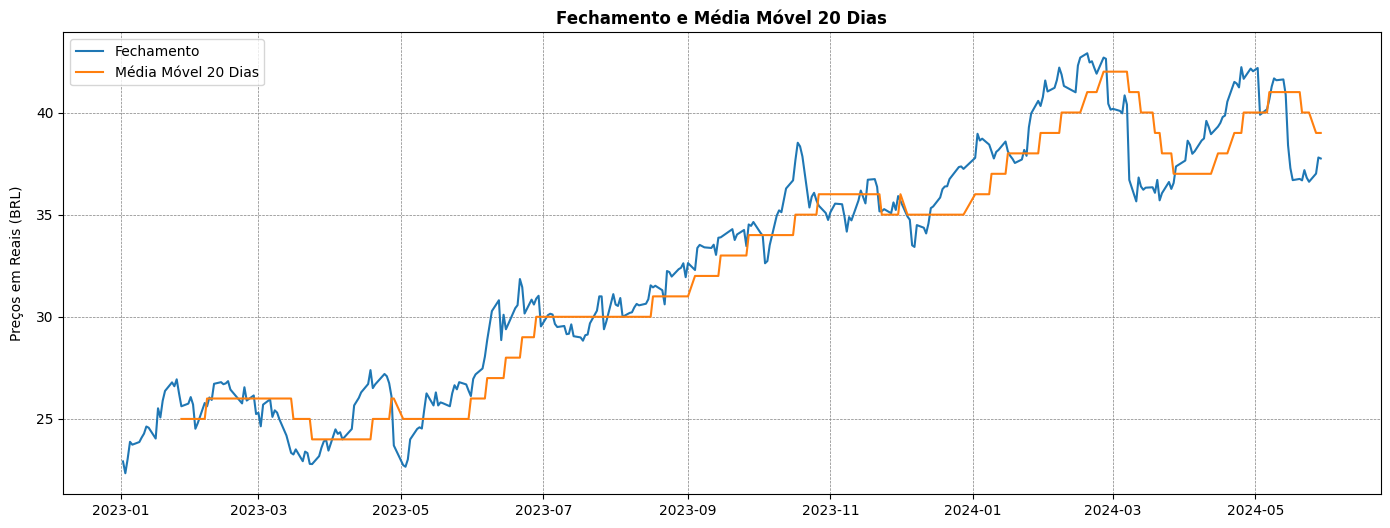

,Open,High,Low,Close,Adj Close,Volume,Resultado%,Resultado_binario,Grupos_mesmo_tamanho,Grupos_pre_definidos,Média_Móvel_20,Altas,Baixas
Date,,,,,,,,,,,,,
2023-01-02,23.540001,23.809999,22.799999,22.920000,16.502495,78424700,-3.0,Negativo,piores_dias,"(-25, -2]",NaN,NaN,NaN
2023-01-03,22.940001,23.100000,22.129999,22.340000,16.084892,96750300,-3.0,Negativo,piores_dias,"(-25, -2]",NaN,NaN,22.34
2023-01-04,21.959999,23.590000,21.830000,23.049999,16.596094,129504000,5.0,Positivo,melhores_dias,"(2, 25]",NaN,NaN,NaN
2023-01-05,23.340000,24.040001,23.150000,23.879999,17.193699,73886000,2.0,Positivo,melhores_dias,"(1, 2]",NaN,23.88,NaN
2023-01-06,23.940001,24.320000,23.549999,23.740000,17.092899,51851500,-1.0,Negativo,piores_dias,"(-2, -1]",NaN,NaN,23.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-23,37.439999,37.709999,36.570000,36.810001,36.810001,47987800,-2.0,Negativo,piores_dias,"(-25, -2]",40.0,NaN,NaN
2024-05-24,37.070000,37.189999,36.570000,36.610001,36.610001,23684700,-1.0,Negativo,piores_dias,"(-2, -1]",40.0,NaN,36.61
2024-05-27,36.720001,37.080002,36.689999,37.009998,37.009998,13623300,1.0,Positivo,melhores_dias,"(-1, 1]",39.0,NaN,NaN


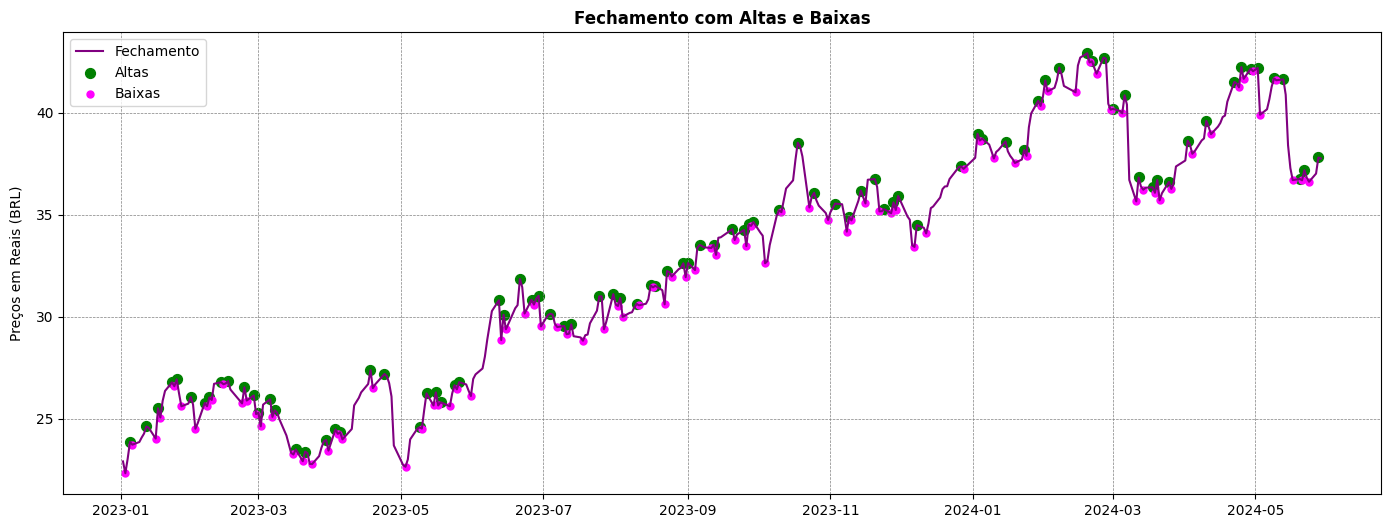

In [5]:
# Execução principal do script
if __name__ == "__main__":
    # Extraindo dados da Yahoo Finance e selecionando as datas
    petr = baixar_dados('PETR4.SA', '2023-01-01', '2024-05-30')
    
    if petr is not None:
        # Calculando o resultado percentual
        petr = calcular_resultado_percentual(petr)
        
        # Classificando os resultados em Positivo, Negativo e Nulo
        petr = adicionar_resultado_binario(petr)
        
        # Contando a quantidade de dias positivos e negativos
        contar_dias(petr)
        
        # Agrupando os resultados em dois grupos de tamanhos iguais
        petr = agrupar_por_tamanho(petr)
        
        # Classificando os resultados em intervalos predefinidos
        petr = intervalos_predefinidos(petr)
        
        # Contando a quantidade de dias em cada intervalo predefinido
        contar_grupos(petr)
        
        # Filtrando os dados para mostrar apenas os dias com resultado percentual entre -1% e 1%
        filtrar_intervalo(petr)
        
        # Calculando a média e o desvio padrão do resultado percentual
        estatisticas(petr)
        
        # Calculando a correlação entre os preços de abertura e fechamento
        correlacao(petr)
        
        # Calculando a média móvel de 20 dias
        petr = media_movel(petr)
        
        # Plotando o gráfico de média móvel com grid e texto rotacionado
        plotar_media_movel(petr)
        
        # Identificando altas e baixas nos dados de fechamento
        petr = identificar_altas_baixas(petr)
        
        # Plotando o gráfico de altas e baixas
        plotar_altas_baixas(petr)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Resultado%
Date,,,,,,,
2023-01-02,23.540001,23.809999,22.799999,22.920000,16.502495,78424700,-3.0
2023-01-03,22.940001,23.100000,22.129999,22.340000,16.084892,96750300,-3.0
2023-01-04,21.959999,23.590000,21.830000,23.049999,16.596094,129504000,5.0
2023-01-05,23.340000,24.040001,23.150000,23.879999,17.193699,73886000,2.0
2023-01-06,23.940001,24.320000,23.549999,23.740000,17.092899,51851500,-1.0
...,...,...,...,...,...,...,...
2024-05-23,37.439999,37.709999,36.570000,36.810001,36.810001,47987800,-2.0
2024-05-24,37.070000,37.189999,36.570000,36.610001,36.610001,23684700,-1.0
2024-05-27,36.720001,37.080002,36.689999,37.009998,37.009998,13623300,1.0


,Open,High,Low,Close,Adj Close,Volume,Resultado%,Resultado_binario
Date,,,,,,,,
2023-01-02,23.540001,23.809999,22.799999,22.920000,16.502495,78424700,-3.0,Negativo
2023-01-03,22.940001,23.100000,22.129999,22.340000,16.084892,96750300,-3.0,Negativo
2023-01-04,21.959999,23.590000,21.830000,23.049999,16.596094,129504000,5.0,Positivo
2023-01-05,23.340000,24.040001,23.150000,23.879999,17.193699,73886000,2.0,Positivo
2023-01-06,23.940001,24.320000,23.549999,23.740000,17.092899,51851500,-1.0,Negativo
...,...,...,...,...,...,...,...,...
2024-05-23,37.439999,37.709999,36.570000,36.810001,36.810001,47987800,-2.0,Negativo
2024-05-24,37.070000,37.189999,36.570000,36.610001,36.610001,23684700,-1.0,Negativo
2024-05-27,36.720001,37.080002,36.689999,37.009998,37.009998,13623300,1.0,Positivo


Dias Positivos: 149, Dias Negativos: 113


,Open,High,Low,Close,Adj Close,Volume,Resultado%,Resultado_binario,Grupos_mesmo_tamanho
Date,,,,,,,,,
2023-01-02,23.540001,23.809999,22.799999,22.920000,16.502495,78424700,-3.0,Negativo,piores_dias
2023-01-03,22.940001,23.100000,22.129999,22.340000,16.084892,96750300,-3.0,Negativo,piores_dias
2023-01-04,21.959999,23.590000,21.830000,23.049999,16.596094,129504000,5.0,Positivo,melhores_dias
2023-01-05,23.340000,24.040001,23.150000,23.879999,17.193699,73886000,2.0,Positivo,melhores_dias
2023-01-06,23.940001,24.320000,23.549999,23.740000,17.092899,51851500,-1.0,Negativo,piores_dias
...,...,...,...,...,...,...,...,...,...
2024-05-23,37.439999,37.709999,36.570000,36.810001,36.810001,47987800,-2.0,Negativo,piores_dias
2024-05-24,37.070000,37.189999,36.570000,36.610001,36.610001,23684700,-1.0,Negativo,piores_dias
2024-05-27,36.720001,37.080002,36.689999,37.009998,37.009998,13623300,1.0,Positivo,melhores_dias


,Open,High,Low,Close,Adj Close,Volume,Resultado%,Resultado_binario,Grupos_mesmo_tamanho,Grupos_pre_definidos
Date,,,,,,,,,,
2023-01-02,23.540001,23.809999,22.799999,22.920000,16.502495,78424700,-3.0,Negativo,piores_dias,"(-25, -2]"
2023-01-03,22.940001,23.100000,22.129999,22.340000,16.084892,96750300,-3.0,Negativo,piores_dias,"(-25, -2]"
2023-01-04,21.959999,23.590000,21.830000,23.049999,16.596094,129504000,5.0,Positivo,melhores_dias,"(2, 25]"
2023-01-05,23.340000,24.040001,23.150000,23.879999,17.193699,73886000,2.0,Positivo,melhores_dias,"(1, 2]"
2023-01-06,23.940001,24.320000,23.549999,23.740000,17.092899,51851500,-1.0,Negativo,piores_dias,"(-2, -1]"
...,...,...,...,...,...,...,...,...,...,...
2024-05-23,37.439999,37.709999,36.570000,36.810001,36.810001,47987800,-2.0,Negativo,piores_dias,"(-25, -2]"
2024-05-24,37.070000,37.189999,36.570000,36.610001,36.610001,23684700,-1.0,Negativo,piores_dias,"(-2, -1]"
2024-05-27,36.720001,37.080002,36.689999,37.009998,37.009998,13623300,1.0,Positivo,melhores_dias,"(-1, 1]"


Grupos_pre_definidos
(-1, 1]      166
(-2, -1]      67
(-25, -2]     46
(1, 2]        46
(2, 25]       26
Name: count, dtype: int64

,Open,High,Low,Close,Adj Close,Volume,Resultado%,Resultado_binario,Grupos_mesmo_tamanho,Grupos_pre_definidos
Date,,,,,,,,,,
2023-01-06,23.940001,24.320000,23.549999,23.740000,17.092899,51851500,-1.0,Negativo,piores_dias,"(-2, -1]"
2023-01-10,23.950001,24.110001,23.370001,24.090000,17.344902,52741100,1.0,Positivo,melhores_dias,"(-1, 1]"
2023-01-11,24.150000,24.620001,24.049999,24.280001,17.481701,53536500,1.0,Positivo,melhores_dias,"(-1, 1]"
2023-01-12,24.290001,24.650000,24.110001,24.629999,17.733702,58130000,1.0,Positivo,melhores_dias,"(-1, 1]"
2023-01-13,24.440001,24.660000,24.250000,24.570000,17.690502,40002700,1.0,Positivo,melhores_dias,"(-1, 1]"
...,...,...,...,...,...,...,...,...,...,...
2024-05-21,36.790001,37.090000,36.570000,36.680000,36.680000,27967400,-0.0,Nulo,piores_dias,"(-1, 1]"
2024-05-24,37.070000,37.189999,36.570000,36.610001,36.610001,23684700,-1.0,Negativo,piores_dias,"(-2, -1]"
2024-05-27,36.720001,37.080002,36.689999,37.009998,37.009998,13623300,1.0,Positivo,melhores_dias,"(-1, 1]"


Média do Resultado%: 0.1908831908831909, Desvio Padrão do Resultado%: 1.7173158676183586
Correlação entre Abertura e Fechamento: 0.995949599820997


,Open,High,Low,Close,Adj Close,Volume,Resultado%,Resultado_binario,Grupos_mesmo_tamanho,Grupos_pre_definidos,Média_Móvel_20
Date,,,,,,,,,,,
2023-01-02,23.540001,23.809999,22.799999,22.920000,16.502495,78424700,-3.0,Negativo,piores_dias,"(-25, -2]",NaN
2023-01-03,22.940001,23.100000,22.129999,22.340000,16.084892,96750300,-3.0,Negativo,piores_dias,"(-25, -2]",NaN
2023-01-04,21.959999,23.590000,21.830000,23.049999,16.596094,129504000,5.0,Positivo,melhores_dias,"(2, 25]",NaN
2023-01-05,23.340000,24.040001,23.150000,23.879999,17.193699,73886000,2.0,Positivo,melhores_dias,"(1, 2]",NaN
2023-01-06,23.940001,24.320000,23.549999,23.740000,17.092899,51851500,-1.0,Negativo,piores_dias,"(-2, -1]",NaN
...,...,...,...,...,...,...,...,...,...,...,...
2024-05-23,37.439999,37.709999,36.570000,36.810001,36.810001,47987800,-2.0,Negativo,piores_dias,"(-25, -2]",40.0
2024-05-24,37.070000,37.189999,36.570000,36.610001,36.610001,23684700,-1.0,Negativo,piores_dias,"(-2, -1]",40.0
2024-05-27,36.720001,37.080002,36.689999,37.009998,37.009998,13623300,1.0,Positivo,melhores_dias,"(-1, 1]",39.0


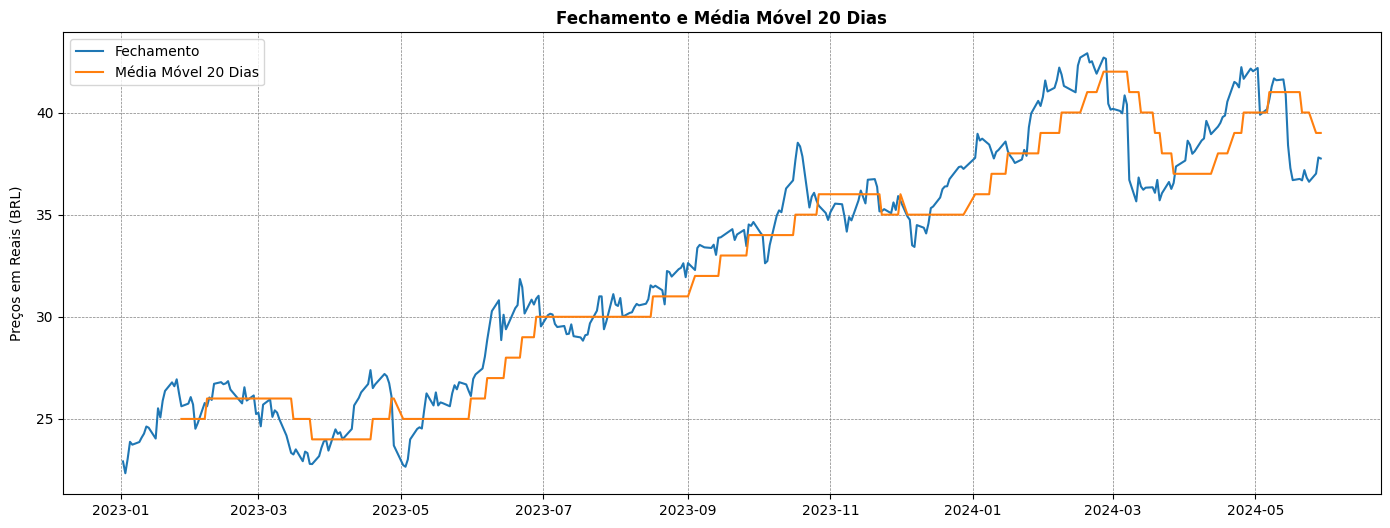

,Open,High,Low,Close,Adj Close,Volume,Resultado%,Resultado_binario,Grupos_mesmo_tamanho,Grupos_pre_definidos,Média_Móvel_20,Altas,Baixas
Date,,,,,,,,,,,,,
2023-01-02,23.540001,23.809999,22.799999,22.920000,16.502495,78424700,-3.0,Negativo,piores_dias,"(-25, -2]",NaN,NaN,NaN
2023-01-03,22.940001,23.100000,22.129999,22.340000,16.084892,96750300,-3.0,Negativo,piores_dias,"(-25, -2]",NaN,NaN,22.34
2023-01-04,21.959999,23.590000,21.830000,23.049999,16.596094,129504000,5.0,Positivo,melhores_dias,"(2, 25]",NaN,NaN,NaN
2023-01-05,23.340000,24.040001,23.150000,23.879999,17.193699,73886000,2.0,Positivo,melhores_dias,"(1, 2]",NaN,23.88,NaN
2023-01-06,23.940001,24.320000,23.549999,23.740000,17.092899,51851500,-1.0,Negativo,piores_dias,"(-2, -1]",NaN,NaN,23.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-23,37.439999,37.709999,36.570000,36.810001,36.810001,47987800,-2.0,Negativo,piores_dias,"(-25, -2]",40.0,NaN,NaN
2024-05-24,37.070000,37.189999,36.570000,36.610001,36.610001,23684700,-1.0,Negativo,piores_dias,"(-2, -1]",40.0,NaN,36.61
2024-05-27,36.720001,37.080002,36.689999,37.009998,37.009998,13623300,1.0,Positivo,melhores_dias,"(-1, 1]",39.0,NaN,NaN


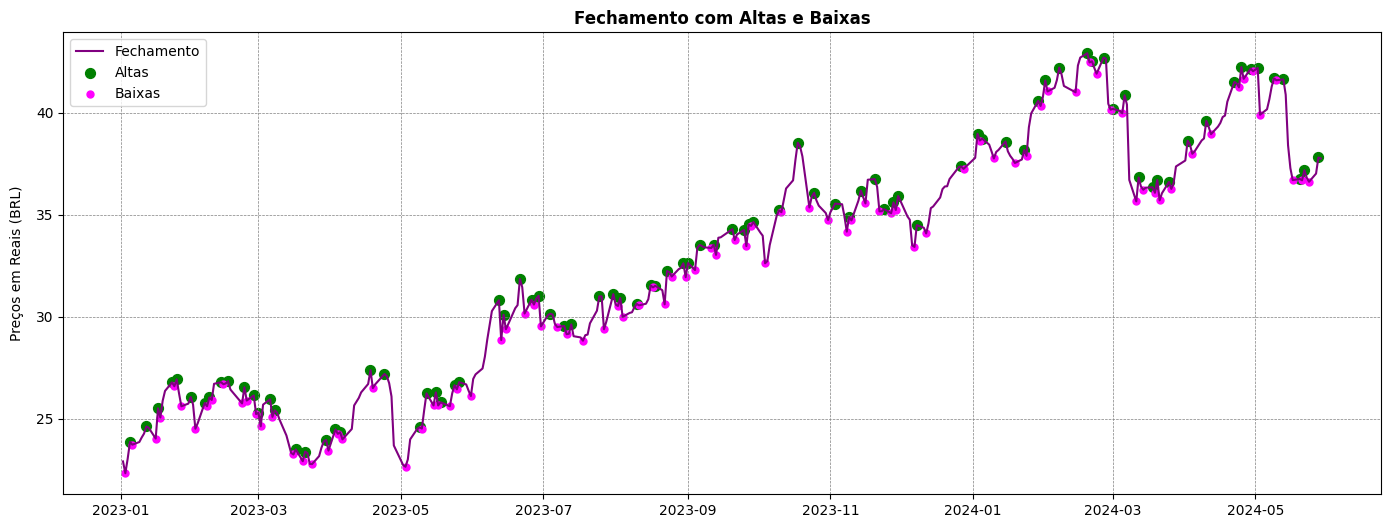

In [6]:
# Execução principal do script
if __name__ == "__main__":
    # Extraindo dados da Yahoo Finance e selecionando as datas
    petr = baixar_dados('PETR4.SA', '2023-01-01', '2024-05-30')
    
    if petr is not None:
        # Calculando o resultado percentual
        petr = calcular_resultado_percentual(petr)
        
        # Classificando os resultados em Positivo, Negativo e Nulo
        petr = adicionar_resultado_binario(petr)
        
        # Contando a quantidade de dias positivos e negativos
        contar_dias(petr)
        
        # Agrupando os resultados em dois grupos de tamanhos iguais
        petr = agrupar_por_tamanho(petr)
        
        # Classificando os resultados em intervalos predefinidos
        petr = intervalos_predefinidos(petr)
        
        # Contando a quantidade de dias em cada intervalo predefinido
        contar_grupos(petr)
        
        # Filtrando os dados para mostrar apenas os dias com resultado percentual entre -1% e 1%
        filtrar_intervalo(petr)
        
        # Calculando a média e o desvio padrão do resultado percentual
        estatisticas(petr)
        
        # Calculando a correlação entre os preços de abertura e fechamento
        correlacao(petr)
        
        # Calculando a média móvel de 20 dias
        petr = media_movel(petr)
        
        # Plotando o gráfico de média móvel com grid e texto rotacionado
        plotar_media_movel(petr)
        
        # Identificando altas e baixas nos dados de fechamento
        petr = identificar_altas_baixas(petr)
        
        # Plotando o gráfico de altas e baixas com grid e texto rotacionado
        plotar_altas_baixas(petr)